# Bootcamp: Cientista de Dados - Trabalho Prático

- Data: maio de 2022.

## Autor

Feito com :heart: por [Alexsander Lopes Camargos](https://github.com/alexcamargos) :wave: Entre em contato!

[![GitHub](https://img.shields.io/badge/-AlexCamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=github&logoColor=white&link=https://github.com/alexcamargos)](https://github.com/alexcamargos)
[![Twitter Badge](https://img.shields.io/badge/-@alcamargos-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=twitter&logoColor=white&link=https://twitter.com/alcamargos)](https://twitter.com/alcamargos)
[![Linkedin Badge](https://img.shields.io/badge/-alexcamargos-1ca0f1?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/alexcamargos/)](https://www.linkedin.com/in/alexcamargos/)
[![Gmail Badge](https://img.shields.io/badge/-alcamargos@vivaldi.net-1ca0f1?style=flat-square&labelColor=1ca0f1&logo=Gmail&logoColor=white&link=mailto:alcamargos@vivaldi.net)](mailto:alcamargos@vivaldi.net)

## Licença

[MIT License](https://choosealicense.com/licenses/mit/)

# Módulo 1 - Análise Estatística de Dados

## Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:

- Análise exploratória
- Teste de hipóteses
- Correlação
- Regressão

## Enunciado

O _Trabalho Prático_ é constituído de um problema de negócio contendo quinze questões, que serão resolvidas utilizando o _R_. Será disponibilizado código R completo para execução de cada questão, a fim de que o aluno possa direcionar seus esforços no entendimento dos métodos estatísticos e interpretações. Mas àquele interessado em aprender o R, é uma excelente oportunidade e pode contar com apoio do professor.

## Atividades

Uma empresa que trabalha com aluguel de veículos deseja estudar algumas variáveis que eles suspeitam que influenciam no preço do aluguel do veículo. Para confirmar essas suspeitas, foi reunido em um conjunto dados um histórico contendo vinte locações que foram exportadas aleatoriamente do banco de dados, ou seja, temos vinte observações.

Foram selecionadas sete variáveis para este estudo:

- _Preço_ (variável contínua medida em reais) – É a variável resposta, nos diz qual foi o preço daquela locação.
- _Portas_ (variável categórica com dois níveis) – Nos informa se o veículo alugado era de duas portas ou quatro portas.
- _Ar Condicionado_ (variável categórica com dois níveis) – Nos informa se o veículo alugado tinha ar-condicionado ou não.
- _Quadrimestre_ (variável categórica com três níveis) – Informa se aquela locação ocorreu no primeiro, segundo ou terceiro quadrimestre do ano.
- _Idade do Locatário_ (variável discreta medida em anos) – Nos informa qual a idade do indivíduo que realizou a locação.
- _Quilometragem_ (variável contínua medida em quilómetros) – Nos informa quantos quilómetros rodados o veículo tinha no ato da locação.
- _Dólar_ (variável contínua medida em dólares) – Nos informa qual a cotação do dólar no dia da locação.


In [1]:
# Versão da Linguagem Python
from platform import python_version as py_version

print(f'Versão da linguagem Python utilizada neste Jupyter Notebook: {py_version()}')


Versão da linguagem Python utilizada neste Jupyter Notebook: 3.10.4


In [2]:
# matplotlib - Biblioteca para plotagem de gráficos
import matplotlib.pyplot as plt

# numpy - Biblioteca para operações matemáticas
import numpy as np

# pandas - Biblioteca para manipulação de dados
import pandas as pd

# scipy - Biblioteca para cálculos matemáticos
import scipy.stats as st

# seaborn - Biblioteca para visualização de dados
import seaborn as sns

# pearson_test - Teste de Pearson para verificar a correlação entre duas variáveis
from scipy.stats import pearsonr as pearson_test

# shapiro_test - Teste de Shapiro-Wilk para verificar a normalidade dos dados
from scipy.stats import shapiro as shapiro_test

# LinearRegression - Cálculo de regressão linear
from sklearn.linear_model import LinearRegression

# statsmodels - Biblioteca para cálculos estatísticos
from statsmodels import api as sm

# ols - Cálculo de regressão linear
from statsmodels.formula.api import ols

In [3]:
# Salvando os gráficos junto (inline) com o notebook.
%matplotlib inline

In [4]:
# Configurando a exibição dos gráficos para o notebook.
sns.set_theme(style='whitegrid', context='notebook')

# Tamanho padrão dos gráficos.
sns.set(rc={'figure.figsize': (12, 6)})

In [5]:
# Carregando a base de dados de dados.
dados = pd.read_csv('dados.csv')

# Transformando a coluna id em índice.
dados.set_index('id', inplace=True)

dados

,Preco,Portas,Ar_Condicionado,Quadrimestre,Idade_Locatario,Quilometragem,Dolar
id,,,,,,,
1,368.384515,duas_portas,sem_ar_condicionado,segundo_quadrimestre,23,957.442781,4.411479
2,446.850187,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,829.533278,5.630144
3,414.727657,duas_portas,com_ar_condicionado,segundo_quadrimestre,28,923.300216,8.805579
4,434.291091,quatro_portas,com_ar_condicionado,segundo_quadrimestre,21,871.519117,4.260591
5,436.652687,quatro_portas,com_ar_condicionado,segundo_quadrimestre,18,930.704106,6.934163
6,457.657973,duas_portas,com_ar_condicionado,terceiro_quadrimestre,21,554.696696,1.611307
7,490.694347,quatro_portas,com_ar_condicionado,primeiro_quadrimestre,18,501.941060,2.578132
8,474.881781,duas_portas,com_ar_condicionado,primeiro_quadrimestre,20,665.435075,4.666667
9,458.462396,quatro_portas,com_ar_condicionado,terceiro_quadrimestre,25,568.240795,1.684607


In [6]:
# Realizando transofmração de variáveis categóricas para variáveis numéricas.
dados_transformados = dados.copy()

# 1 - duas_portas | 2 - quatro_portas
dados_transformados.loc[dados_transformados['Portas'] == 'duas_portas', ['Portas']] = 1
dados_transformados.loc[dados_transformados['Portas'] == 'quatro_portas', ['Portas']] = 2
dados_transformados.loc[:,'Portas'] = dados_transformados['Portas'].astype(int)

# 1 - sem_ar_condicionado | 2 - com_ar_condicionado
dados_transformados.loc[dados_transformados['Ar_Condicionado'] == 'sem_ar_condicionado', ['Ar_Condicionado']] = 1
dados_transformados.loc[dados_transformados['Ar_Condicionado'] == 'com_ar_condicionado', ['Ar_Condicionado']] = 2
dados_transformados.loc[:, 'Ar_Condicionado'] = dados_transformados['Ar_Condicionado'].astype(int)

# 1 - primeiro_quadrimestre | 2 - segundo_quadrimestre | 3 - terceiro_quadrimestre
dados_transformados.loc[dados_transformados['Quadrimestre'] == 'primeiro_quadrimestre', ['Quadrimestre']] = 1
dados_transformados.loc[dados_transformados['Quadrimestre'] == 'segundo_quadrimestre', ['Quadrimestre']] = 2
dados_transformados.loc[dados_transformados['Quadrimestre'] == 'terceiro_quadrimestre', ['Quadrimestre']] = 3
dados_transformados.loc[:, 'Quadrimestre'] = dados_transformados['Quadrimestre'].astype(int)

dados_transformados

,Preco,Portas,Ar_Condicionado,Quadrimestre,Idade_Locatario,Quilometragem,Dolar
id,,,,,,,
1,368.384515,1,1,2,23,957.442781,4.411479
2,446.850187,2,2,2,18,829.533278,5.630144
3,414.727657,1,2,2,28,923.300216,8.805579
4,434.291091,2,2,2,21,871.519117,4.260591
5,436.652687,2,2,2,18,930.704106,6.934163
6,457.657973,1,2,3,21,554.696696,1.611307
7,490.694347,2,2,1,18,501.941060,2.578132
8,474.881781,1,2,1,20,665.435075,4.666667
9,458.462396,2,2,3,25,568.240795,1.684607


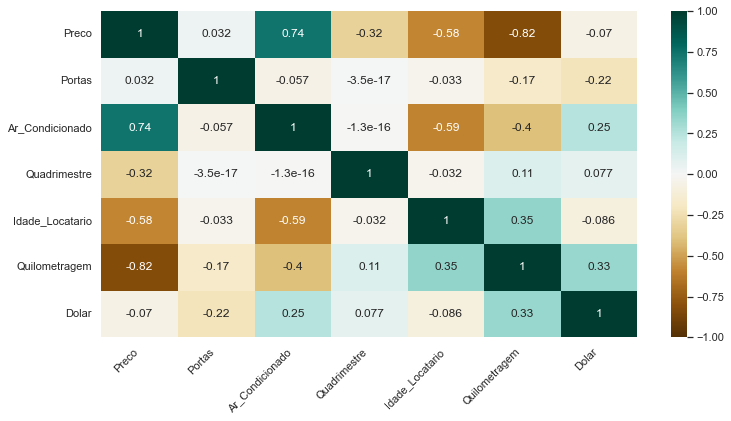

In [7]:
# Correlação entre as colunas que contem informações numéricas.
# https://www.tylervigen.com/spurious-correlations
heatmap = sns.heatmap(dados_transformados.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG',
                      center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right');


# Pergunta 1

*Explore a variável resposta, que é o Preço, e responda:*

_Pelo histograma, você diria que a variável Preço segue uma distribuição normal?_

*Obs.*: Para verificar a normalidade dde uma dada distribuição podemos utilizar três ferramentas: _o teste Shapiro-Wilk_, o _histograma_ e o _QQ-plot_.


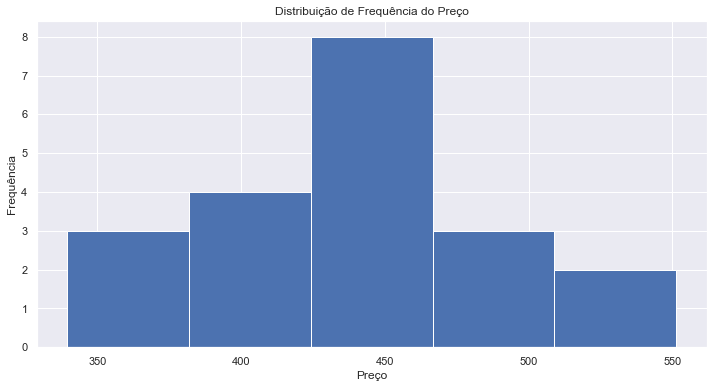

In [8]:
# Histograma da variável preço.
preco_hist = dados_transformados['Preco'].plot.hist(bins=5, figsize=(12, 6))
preco_hist.set_xlabel('Preço')
preco_hist.set_ylabel('Frequência')
preco_hist.set_title('Distribuição de Frequência do Preço');

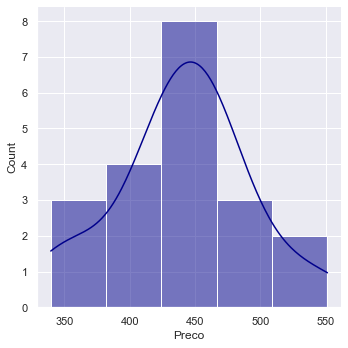

In [9]:
# Histograma da variável preço usando o Seaborn.
sns.displot(dados_transformados['Preco'], kde=True, bins=5, color='darkblue');

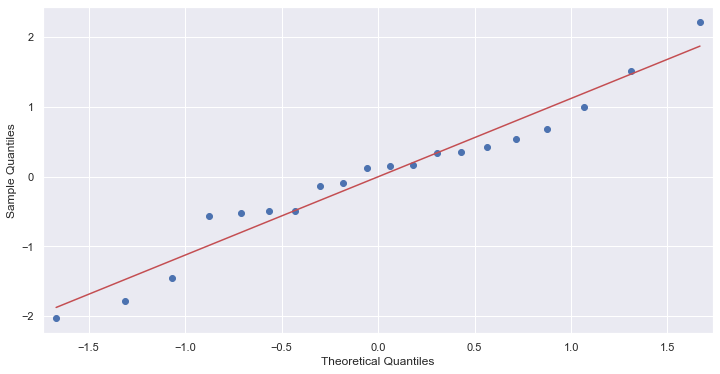

In [10]:
# Visualizando a distribuição da variável Preço utilizando Q-Q plot (quantile plot).
sm.qqplot(dados_transformados['Preco'], line='r', fit=True);

In [11]:
# Teste de normalidade via Shapiro-Wilk.
statistic_w, p_value = shapiro_test(dados_transformados['Preco'])
print(f'Teste de normalidade via Shapiro-Wilk - Estatística W: {statistic_w:.4f}')
print(f'Teste de normalidade via Shapiro-Wilk - P Valor: {p_value:.4f}')

Teste de normalidade via Shapiro-Wilk - Estatística W: 0.9656
Teste de normalidade via Shapiro-Wilk - P Valor: 0.6604


# Pergunta 2

*Explore a variável resposta, que é o Preço, e responda:*

Pelo boxplot do Preço, você consegue visualizar algum outlier?

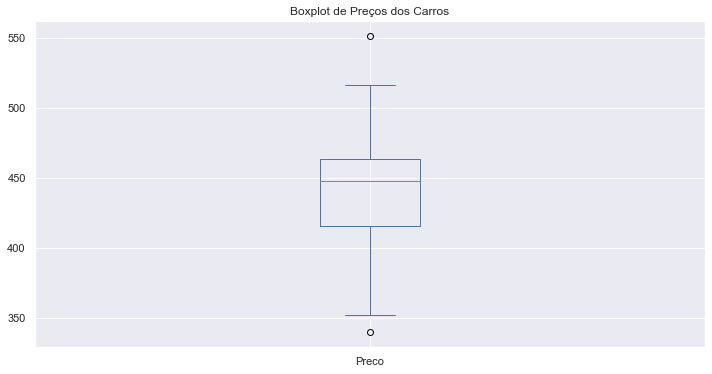

In [12]:
# boxplot da variável preço.
preco_box = dados_transformados['Preco'].plot.box(figsize=(12, 6))
preco_box.set_title('Boxplot de Preços dos Carros');

In [13]:
# Mostrando quem são os outliers para a variável preço.
# Apenas os dados que esteja apos 2 sigma da média serão exibidos.
dados_transformados[np.abs(st.zscore(dados_transformados['Preco'])) > 2].sort_values(by='Preco')

,Preco,Portas,Ar_Condicionado,Quadrimestre,Idade_Locatario,Quilometragem,Dolar
id,,,,,,,
20,339.548470,2,1,2,29,930.704106,4.701089
16,551.315803,2,2,1,21,351.547138,5.557754


# Pergunta 3

*Explore a variável resposta, que é o Preço, e responda:*

_Qual é o valor mediano do Preço e qual a sua interpretação CORRETA?_


In [14]:
# Estatísticas descritivas da variável preço.
dados_transformados['Preco'].describe()

count     20.000000
mean     440.741058
std       51.071729
min      339.548470
25%      415.795130
50%      447.824609
75%      463.494766
max      551.315803
Name: Preco, dtype: float64

In [15]:
print(f'Valor mediano da variável Preço: R${dados_transformados["Preco"].median():.2f}')

Valor mediano da variável Preço: R$447.82


# Pergunta 4

Explore a relação entre as variáveis Preço e Quadrimestre, e responda:

_Através do boxplot, como o Preço se comporta em relação a cada Quadrimestre?_


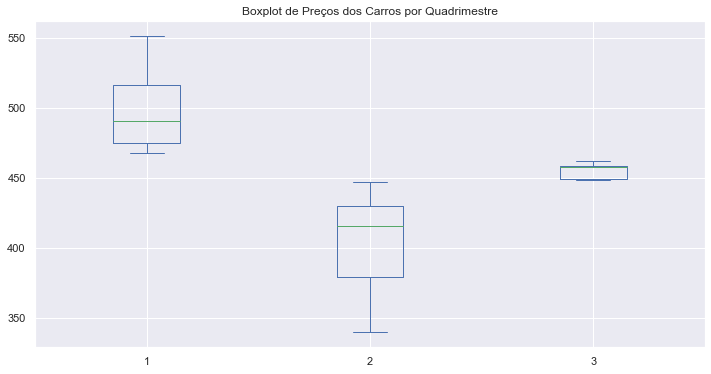

In [16]:
# Explorando a relação entre as variáveis Preço e Quadrimestre.
dados_transformados.plot.box(column='Preco',
                             by='Quadrimestre',
                             figsize=(12, 6))
plt.title('Boxplot de Preços dos Carros por Quadrimestre');

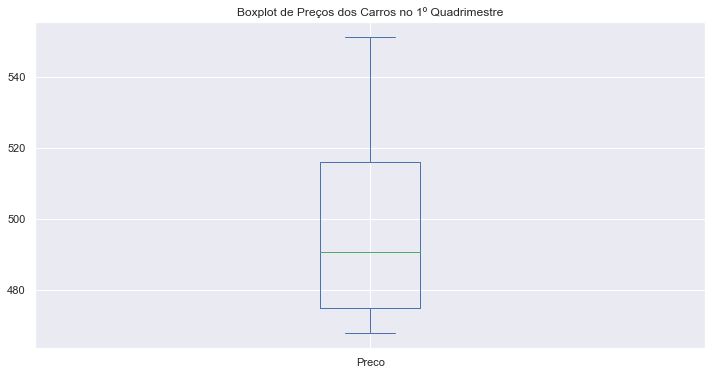

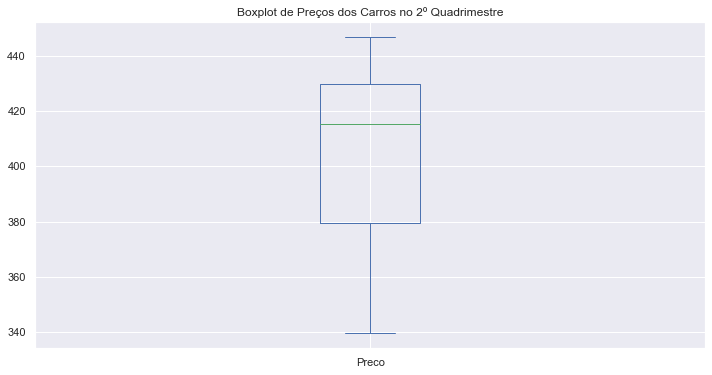

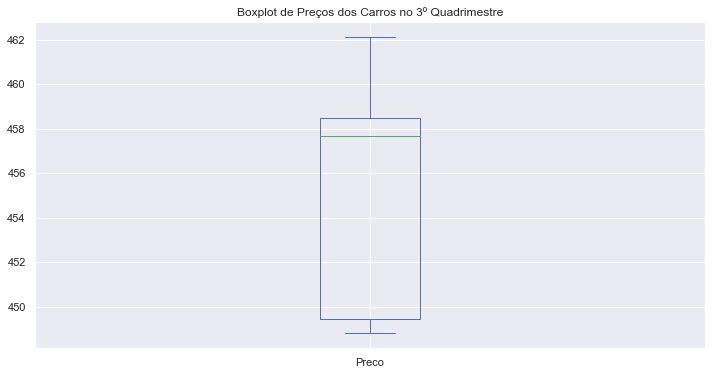

In [17]:
quand_01_fig, quand_02_fig, quand_03_fig = dados_transformados.groupby('Quadrimestre').plot.box(column='Preco',
                                                                                                figsize=(12, 6))
quand_01_fig.set_title('Boxplot de Preços dos Carros no 1º Quadrimestre')
quand_02_fig.set_title('Boxplot de Preços dos Carros no 2º Quadrimestre')
quand_03_fig.set_title('Boxplot de Preços dos Carros no 3º Quadrimestre');

In [18]:
preco_medio_quadrimeste = dados_transformados.groupby('Quadrimestre')['Preco'].mean()
print(f'Média da variável Preço no 1º Quadrimestre: R${preco_medio_quadrimeste[1]:.2f}')
print(f'Média da variável Preço no 2º Quadrimestre: R${preco_medio_quadrimeste[2]:.2f}')
print(f'Média da variável Preço no 3º Quadrimestre: R${preco_medio_quadrimeste[3]:.2f}')

Média da variável Preço no 1º Quadrimestre: R$500.09
Média da variável Preço no 2º Quadrimestre: R$403.79
Média da variável Preço no 3º Quadrimestre: R$455.30


# Pergunta 5

*Explore a relação entre as variáveis Preço e Quadrimestre, e responda:*

_Através de uma ANOVA, existe diferença significativa entre o Preço médio de pelo menos um Quadrimestre em relação aos outros? Como chegou a essa conclusão? Adote 95% de confiança na sua interpretação._


In [19]:
# Ordinary Least Squares (OLS) model
model = ols('Preco ~ C(Quadrimestre)', data=dados_transformados).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# output (ANOVA F and p value) like R.
print(f'P-value: {anova_table["PR(>F)"]["C(Quadrimestre)"]:.8f}')
anova_table

P-value: 0.00012590


,sum_sq,df,F,PR(>F)
C(Quadrimestre),32327.673951,2.0,15.947667,0.000126
Residual,17230.434326,17.0,NaN,NaN


# Pergunta 6

*Explore a relação entre as variáveis Preço e Portas, e responda:*

_Através de um teste t de Student para amostras independentes, existe diferença significativa entre o preço médio do aluguel do veículo com duas portas quando comparado com o preço médio do veículo de quatro portas? Adote *95%* de confiança ao realizar na sua interpretação._


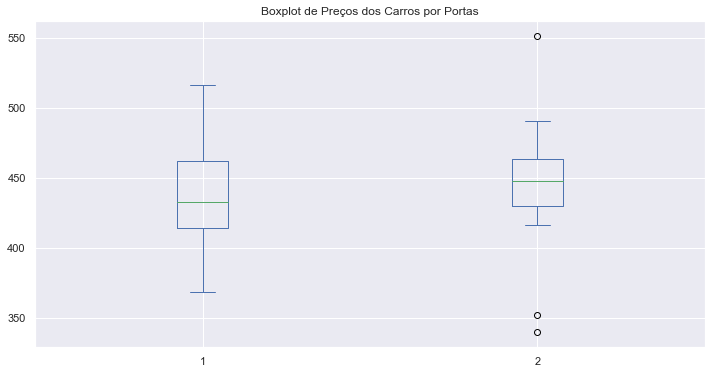

In [20]:
# Explorando a relação entre a variável Preço e a variável Portas.
dados_transformados.plot.box(column='Preco', by='Portas', figsize=(12, 6))
plt.title('Boxplot de Preços dos Carros por Portas');

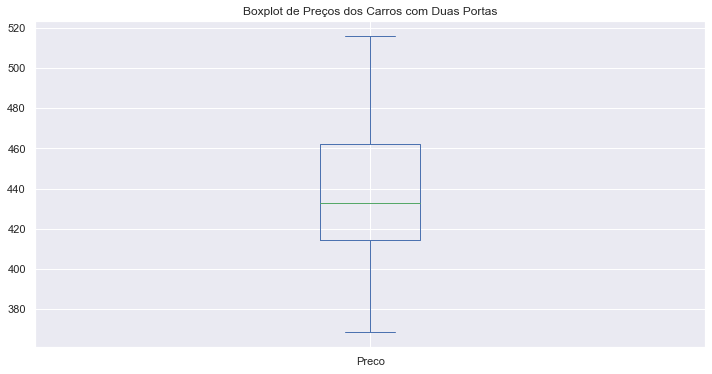

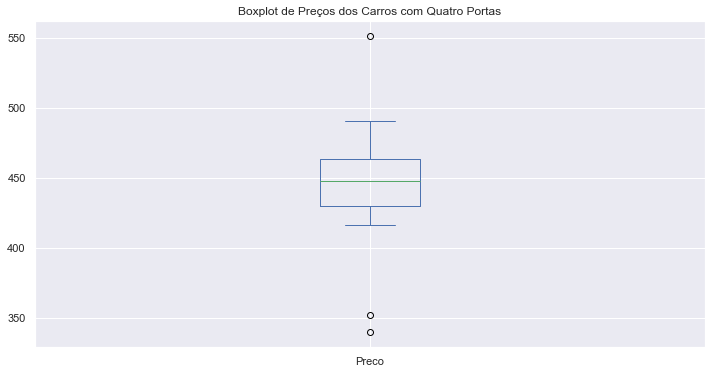

In [21]:
portas_01_fig, portas_02_fig = dados_transformados.groupby('Portas').plot.box(column='Preco',
                                                                              figsize=(12, 6))
portas_01_fig.set_title('Boxplot de Preços dos Carros com Duas Portas')
portas_02_fig.set_title('Boxplot de Preços dos Carros com Quatro Portas');

In [22]:
statistic_t, p_value = st.ttest_ind(dados_transformados['Preco'],
                                    dados_transformados['Portas'])
print(f'Teste de normalidade via T-Test - Estatística T: {statistic_t:.2f}')
print(f'Teste de normalidade via T-Test - P Valor: {p_value}')

Teste de normalidade via T-Test - Estatística T: 38.45
Teste de normalidade via T-Test - P Valor: 4.943723456010529e-32


In [23]:
media_preco_portas = dados_transformados.groupby('Portas')['Preco'].mean()
print(f'Média da variável Preço com duas portas: R${media_preco_portas[1]:.4f}')
print(f'Média da variável Preço com quatro portas: R${media_preco_portas[2]:.4f}')

Média da variável Preço com duas portas: R$438.7862
Média da variável Preço com quatro portas: R$442.0443


# Pergunta 7

*Explore a relação entre as variáveis Preço e Quilometragem, e responda:*

_Pelo gráfico de dispersão, você identifica que existe relação linear entre o Preço e a Quilometragem? Se sim, a relação é positiva ou negativa?_


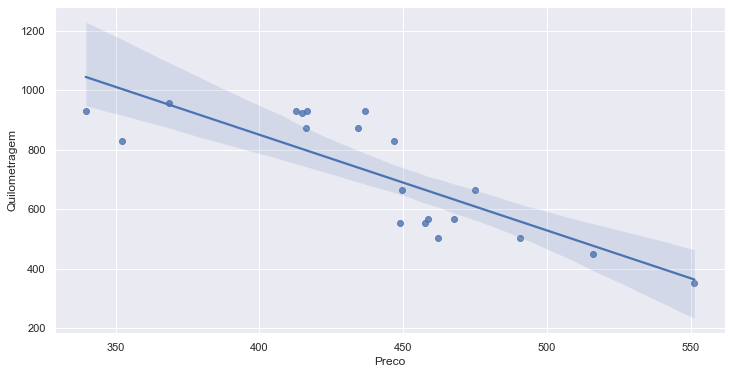

In [24]:
# Explorando a relação entre as variáveis Preço e Quilometragem.
sns.regplot(data=dados_transformados, x='Preco', y='Quilometragem');

# Pergunta 8

*Explore a relação entre as variáveis Preço e Quilometragem, e responda:*

_Obtenha o valor do coeficiente de correlação linear de Pearson entre o Preço e a Quilometragem. Qual a interpretação CORRETA?_


In [25]:
# Coeficiente de correlação de Pearson entre Preço e Quilometragem.
corr_quilometragem, p_value = pearson_test(dados_transformados['Preco'],
                                           dados_transformados['Quilometragem'])
print(f'Coefficient of correlation: {corr_quilometragem:.2f}.')
print(f'p-value: {p_value:.8f}.')

Coefficient of correlation: -0.82.
p-value: 0.00000829.


# Pergunta 9

*Explore a relação entre as variáveis Preço e Quilometragem, e responda:*

_Se tentarmos utilizar somente a Quilometragem para prever o valor do Preço, o quanto da variação do Preço a variável Quilometragem consegue explicar? Em outras palavras, interprete o R2 da regressão linear do Preço em função da Quilometragem._


In [26]:
X = dados_transformados['Quilometragem']
Y = dados_transformados['Preco']
slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

print(f'Slope: {slope:.4f}')
print(f'Intercept: {intercept:.4f}')
print(f'R-squared: {pow(r_value, 2) * 100:.2f}%')
print(f'P: {p_value:.8f}')
print(f'Standard Error: {std_err:.4f}')

Slope: -0.2106
Intercept: 592.2569
R-squared: 67.76%
P: 0.00000829
Standard Error: 0.0342


# Pergunta 10

*Explore a variável Quilometragem, e responda:*

_Qual o valor do primeiro quartil e qual a sua interpretação CORRETA?_


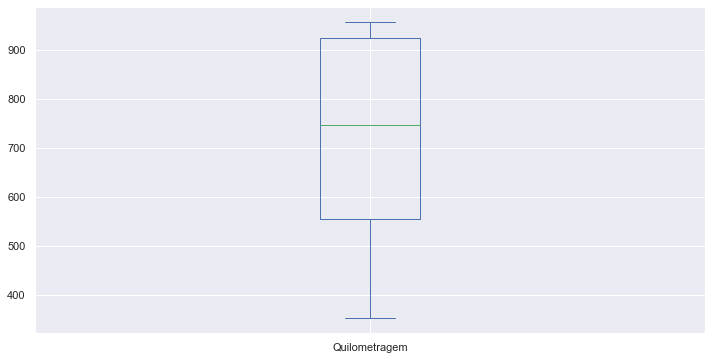

In [27]:
dados_transformados['Quilometragem'].plot.box(figsize=(12, 6));

In [28]:
dados_transformados['Quilometragem'].describe()

count     20.000000
mean     719.285530
std      199.574967
min      351.547138
25%      554.696696
50%      747.484177
75%      925.151188
max      957.442781
Name: Quilometragem, dtype: float64

In [29]:
dados_transformados['Quilometragem'].quantile([0.25, 0.5, 0.75])

0.25    554.696696
0.50    747.484177
0.75    925.151188
Name: Quilometragem, dtype: float64

In [30]:
frist_quartile = dados_transformados['Quilometragem'].quantile(0.25)
print(f'Primeiro Quartil: {frist_quartile:.1f}')

Primeiro Quartil: 554.7


# Pergunta 11

*Explore a variável Quilometragem, e responda:*

_Qual o valor do terceiro quartil e qual a sua interpretação CORRETA?_


In [31]:
thrid_quartile = dados_transformados['Quilometragem'].quantile(0.75)
print(f'Primeiro Quartil: {thrid_quartile:.1f}')

Primeiro Quartil: 925.2


# Pergunta 12

*Explore a variável Quilometragem e responda:*

_Qual é o valor do coeficiente de variação e qual a sua interpretação CORRETA?_


In [32]:
# Calculo do coeficiente de variação de forma manual.
coeficiente_variacao_quilometragem = (dados_transformados['Quilometragem'].std() / dados_transformados['Quilometragem'].mean()) * 100
print(f'Coeficiente de Variação: {coeficiente_variacao_quilometragem:.2f}%')

Coeficiente de Variação: 27.75%


In [33]:
# Calculo do coeficiente de variação de forma automática.
variation_quilometragem = st.variation(dados_transformados['Quilometragem']) * 100
print(f'Coeficiente de Variação: {variation_quilometragem:.2f}%')

Coeficiente de Variação: 27.04%
